In [1]:
using CairoMakie

import LilGuys as lguys
using Arya
using LilGuys

In [2]:
function sigma_axis(gp; limits=(-1, 2, -2, 2.5), kwargs...) 
	ax = Axis(gp, 
		xlabel=log_r_label,
		ylabel = log_sigma_label,
        limits=limits
		;kwargs...
	)

	return  ax
end

sigma_axis (generic function with 1 method)

In [4]:
function load_profiles(modelname, starsname; extension="stellar_profiles.hdf5")
    path = joinpath(modelsdir, modelname, "stars", starsname, extension)

    parampath = joinpath(modelsdir, modelname, "stars", starsname, "profile.toml")
        
    if isfile(parampath)
        expected = LilGuys.load_profile(parampath)
    else
        @warn "$parampath not found"
        expected = nothing
    end

    profs = LilGuys.read_ordered_structs(path, LilGuys.SurfaceDensityProfile)
   
    return profs, expected
end

load_profiles (generic function with 1 method)

In [27]:
function compare_profiles(profiles, expected=nothing; 
        sequential=false, legend=true, limits=(-2.5, 1.0, -6, 3), 
        kwargs...
    )
    
    fig = Figure()

	ax = sigma_axis(fig[1, 1]; limits=limits, kwargs...)

    plot_kwargs = Dict{Symbol, Any}()

    if sequential
        plot_kwargs[:colorrange] = (1, length(profiles))
    end
    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.log_R
        y = prof.log_Sigma
        if sequential
            plot_kwargs[:color] = i
        end

    	lines!(x, y, label=string(label); plot_kwargs...)
    end

    if expected !== nothing
    	log_r_pred = LinRange(-2, 2, 1000)
    	ρ_s_pred = lguys.surface_density.(expected, 10 .^ log_r_pred)

    	lines!(log_r_pred, log10.(ρ_s_pred), label="expected", color="black", linestyle=:dot)
    end

    if legend
    	axislegend(ax, position=:lb)
    end 
    
	fig
end

compare_profiles (generic function with 2 methods)

In [ ]:
"""
    all_plots(profiles[, expected])

Given the profiles object, this function displayes the plots
for the profiles and r percentiles for each timestep in the profile

"""
function all_plots(profiles, expected=nothing; prof_limits=(-2, 1, -15, 3), title="")
   display(compare_profiles(profiles, expected, 
            sequential=true, legend=false, title=title, limits=prof_limits,
        )
    )
end

In [10]:
prof_expected = lguys.SurfaceDensityProfile(joinpath(ENV["DWARFS_ROOT"], "observations/sculptor/density_profiles/fiducial_profile.toml"));

In [11]:
log_r_label = "log r / kpc"

"log r / kpc"

In [12]:
log_sigma_label = L"$\log \Sigma$ / N\,kpc$^{-2}$"

L"$\log \Sigma$ / N\,kpc$^{-2}$"

"/cosma/home/durham/dc-boye1/data/dwarfs/analysis/"

## V=32, r=5.9 (the initial model)

In [ ]:
models = []

In [19]:
readdir(joinpath("1e7_V31_r3.2/orbit_mean/stars/exp2d_rs0.10"))

22-element Vector{String}:
 "figures"
 "final.fits"
 "final.log"
 "final_profile.toml"
 "initial.fits"
 "initial.log"
 "initial_profile.toml"
 "iso_final.fits"
 "iso_final.log"
 "iso_final_profile.toml"
 "iso_initial.fits"
 "iso_initial.log"
 "iso_initial_profile.toml"
 "iso_paint.fits"
 "iso_paint.log"
 "iso_paint_profile.toml"
 "properties.toml"
 "stellar_profiles.hdf5"
 "stellar_profiles.log"
 "stellar_profiles_3d.hdf5"
 "stellar_profiles_3d.log"
 "stellar_profiles_3d_scalars.fits"

In [34]:
profs, expected = load_profiles("sculptor/1e7_V31_r3.2/", "exp2d_rs0.08");

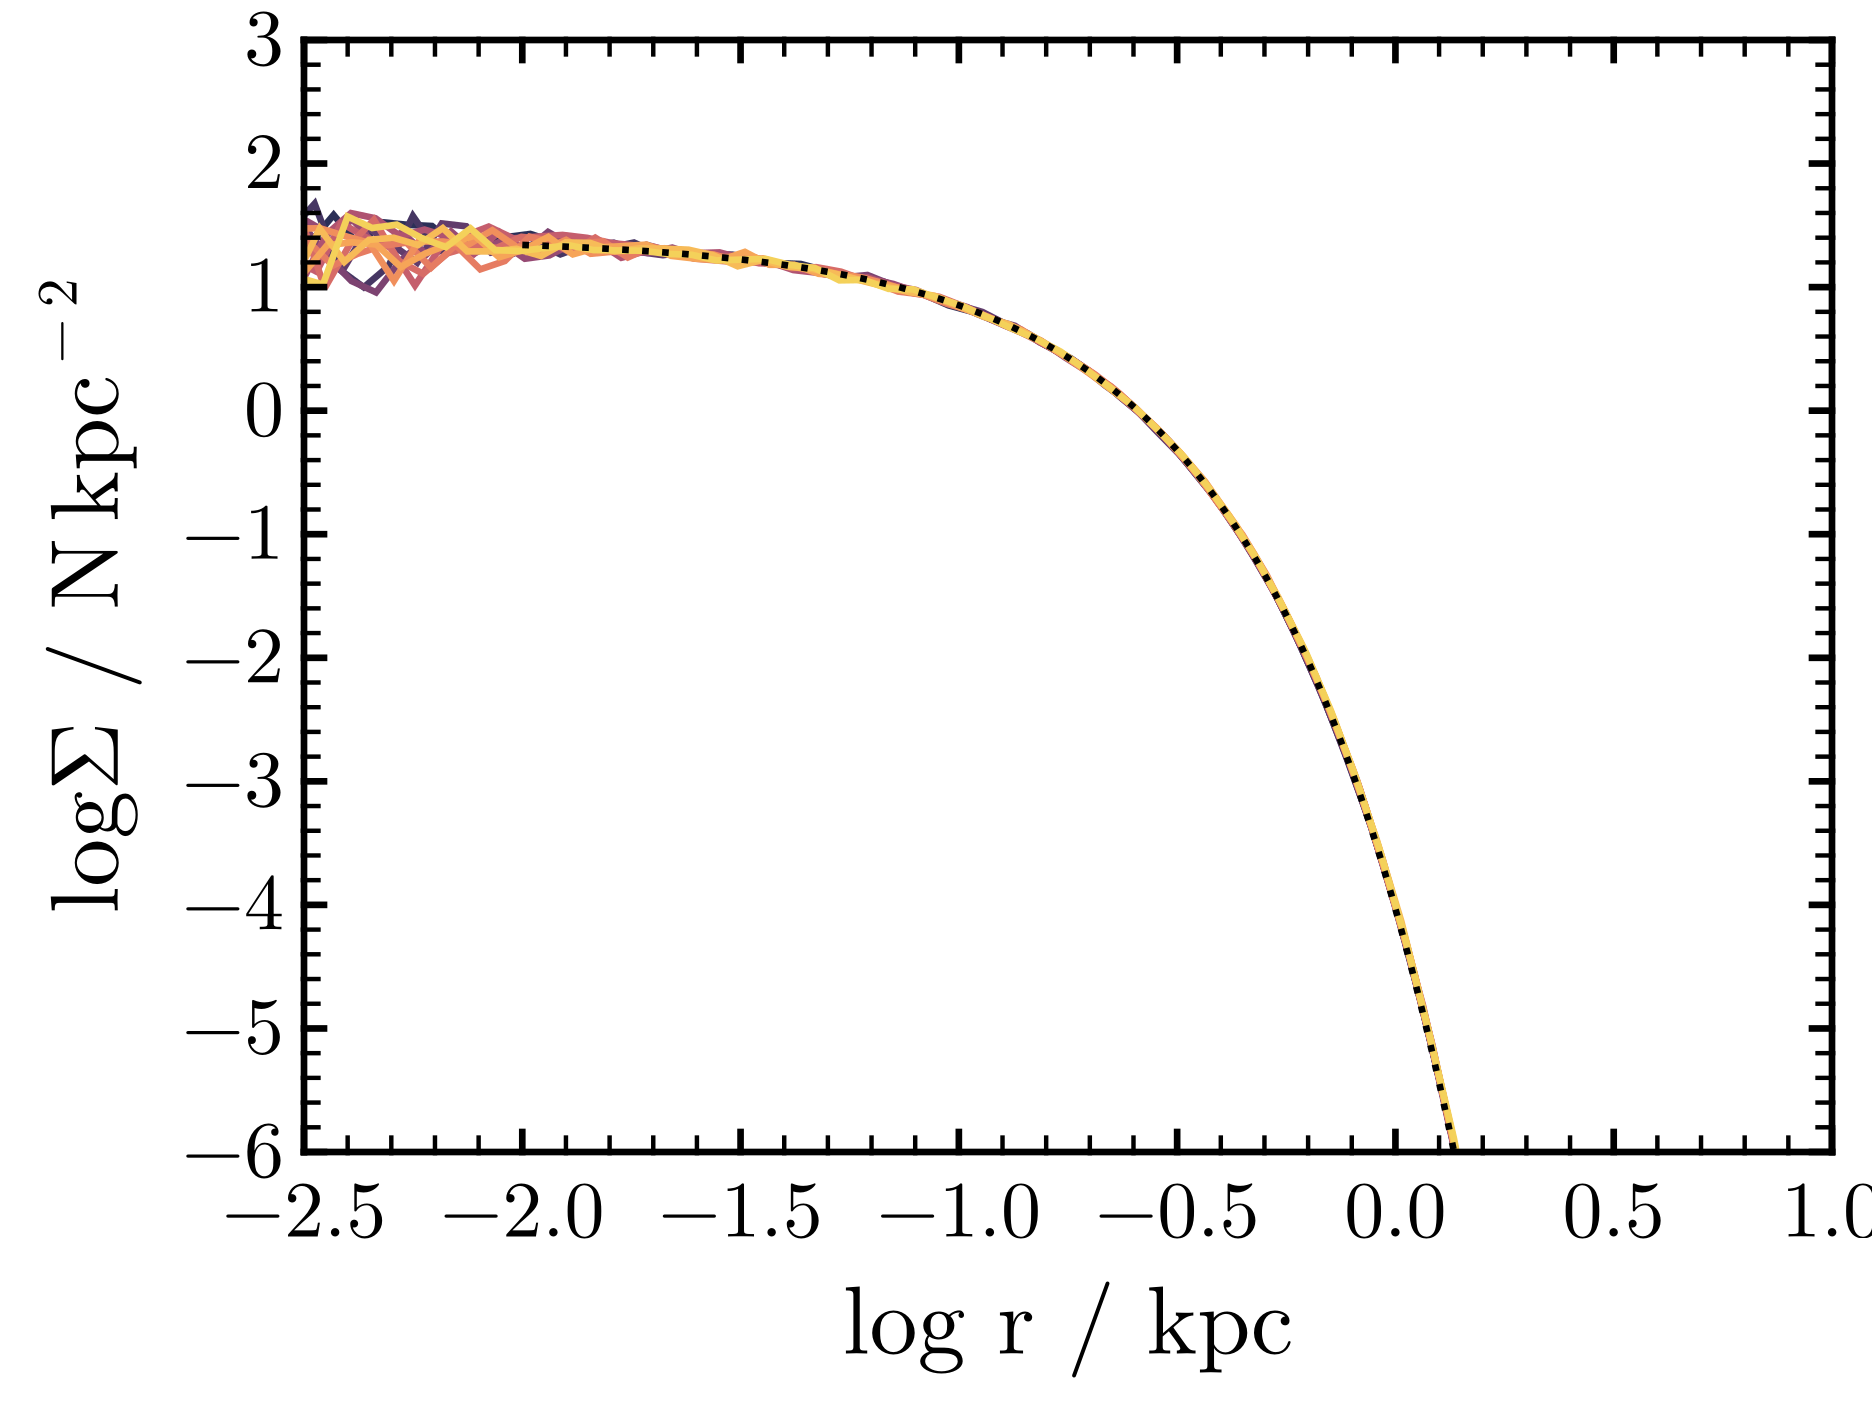

In [35]:
compare_profiles(profs, expected, sequential=true, legend=false)

In [29]:
profs, expected = load_profiles("sculptor/1e7_V31_r3.2/", "exp2d_rs0.10");

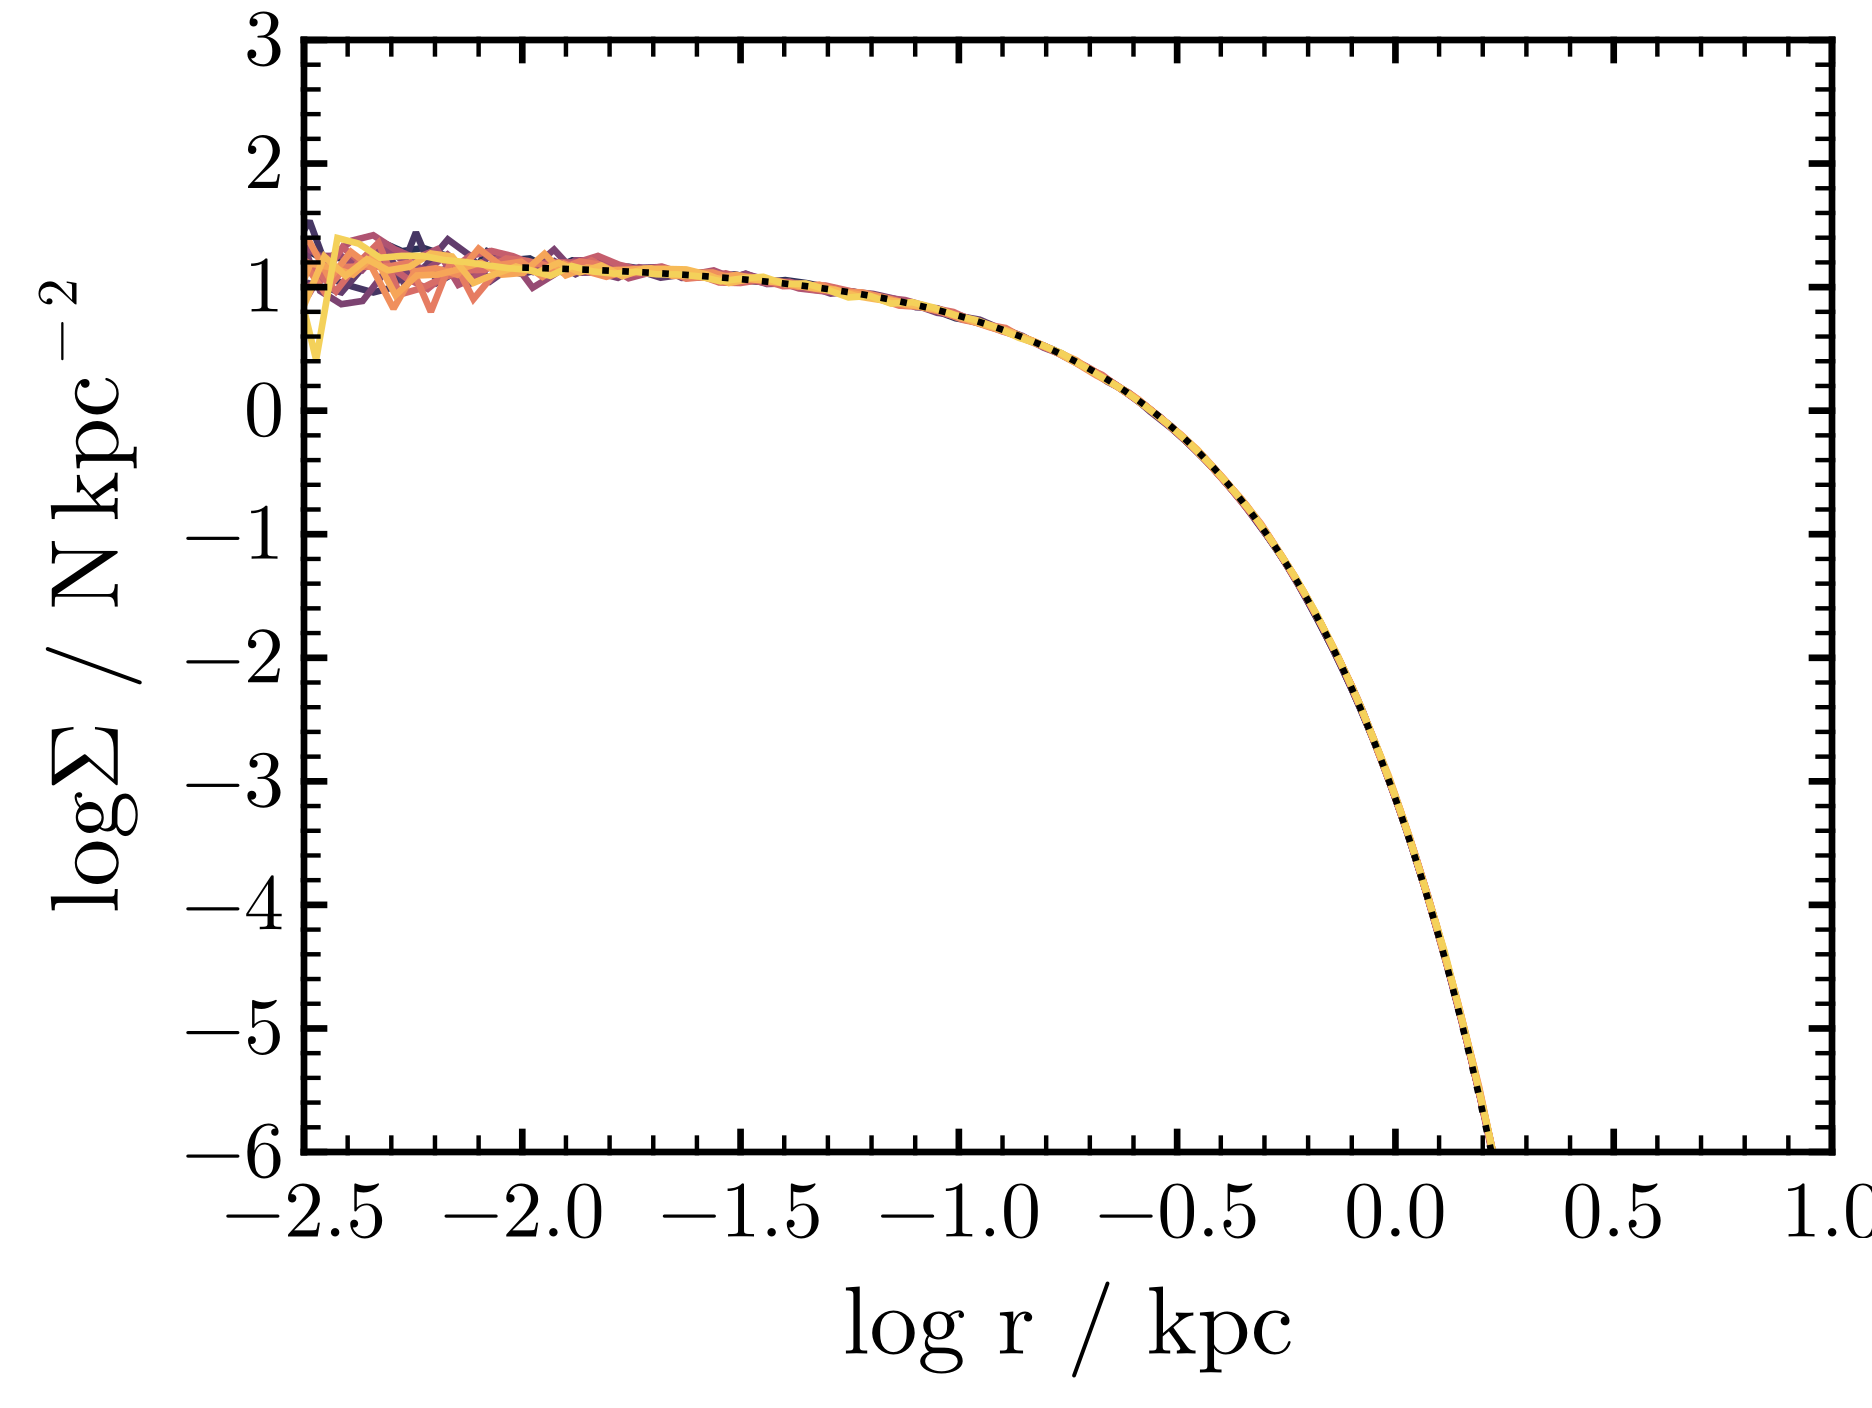

In [31]:
compare_profiles(profs, expected, sequential=true, legend=false)

In [36]:
profs, expected = load_profiles("sculptor/1e7_V31_r3.2/", "exp2d_rs0.13");

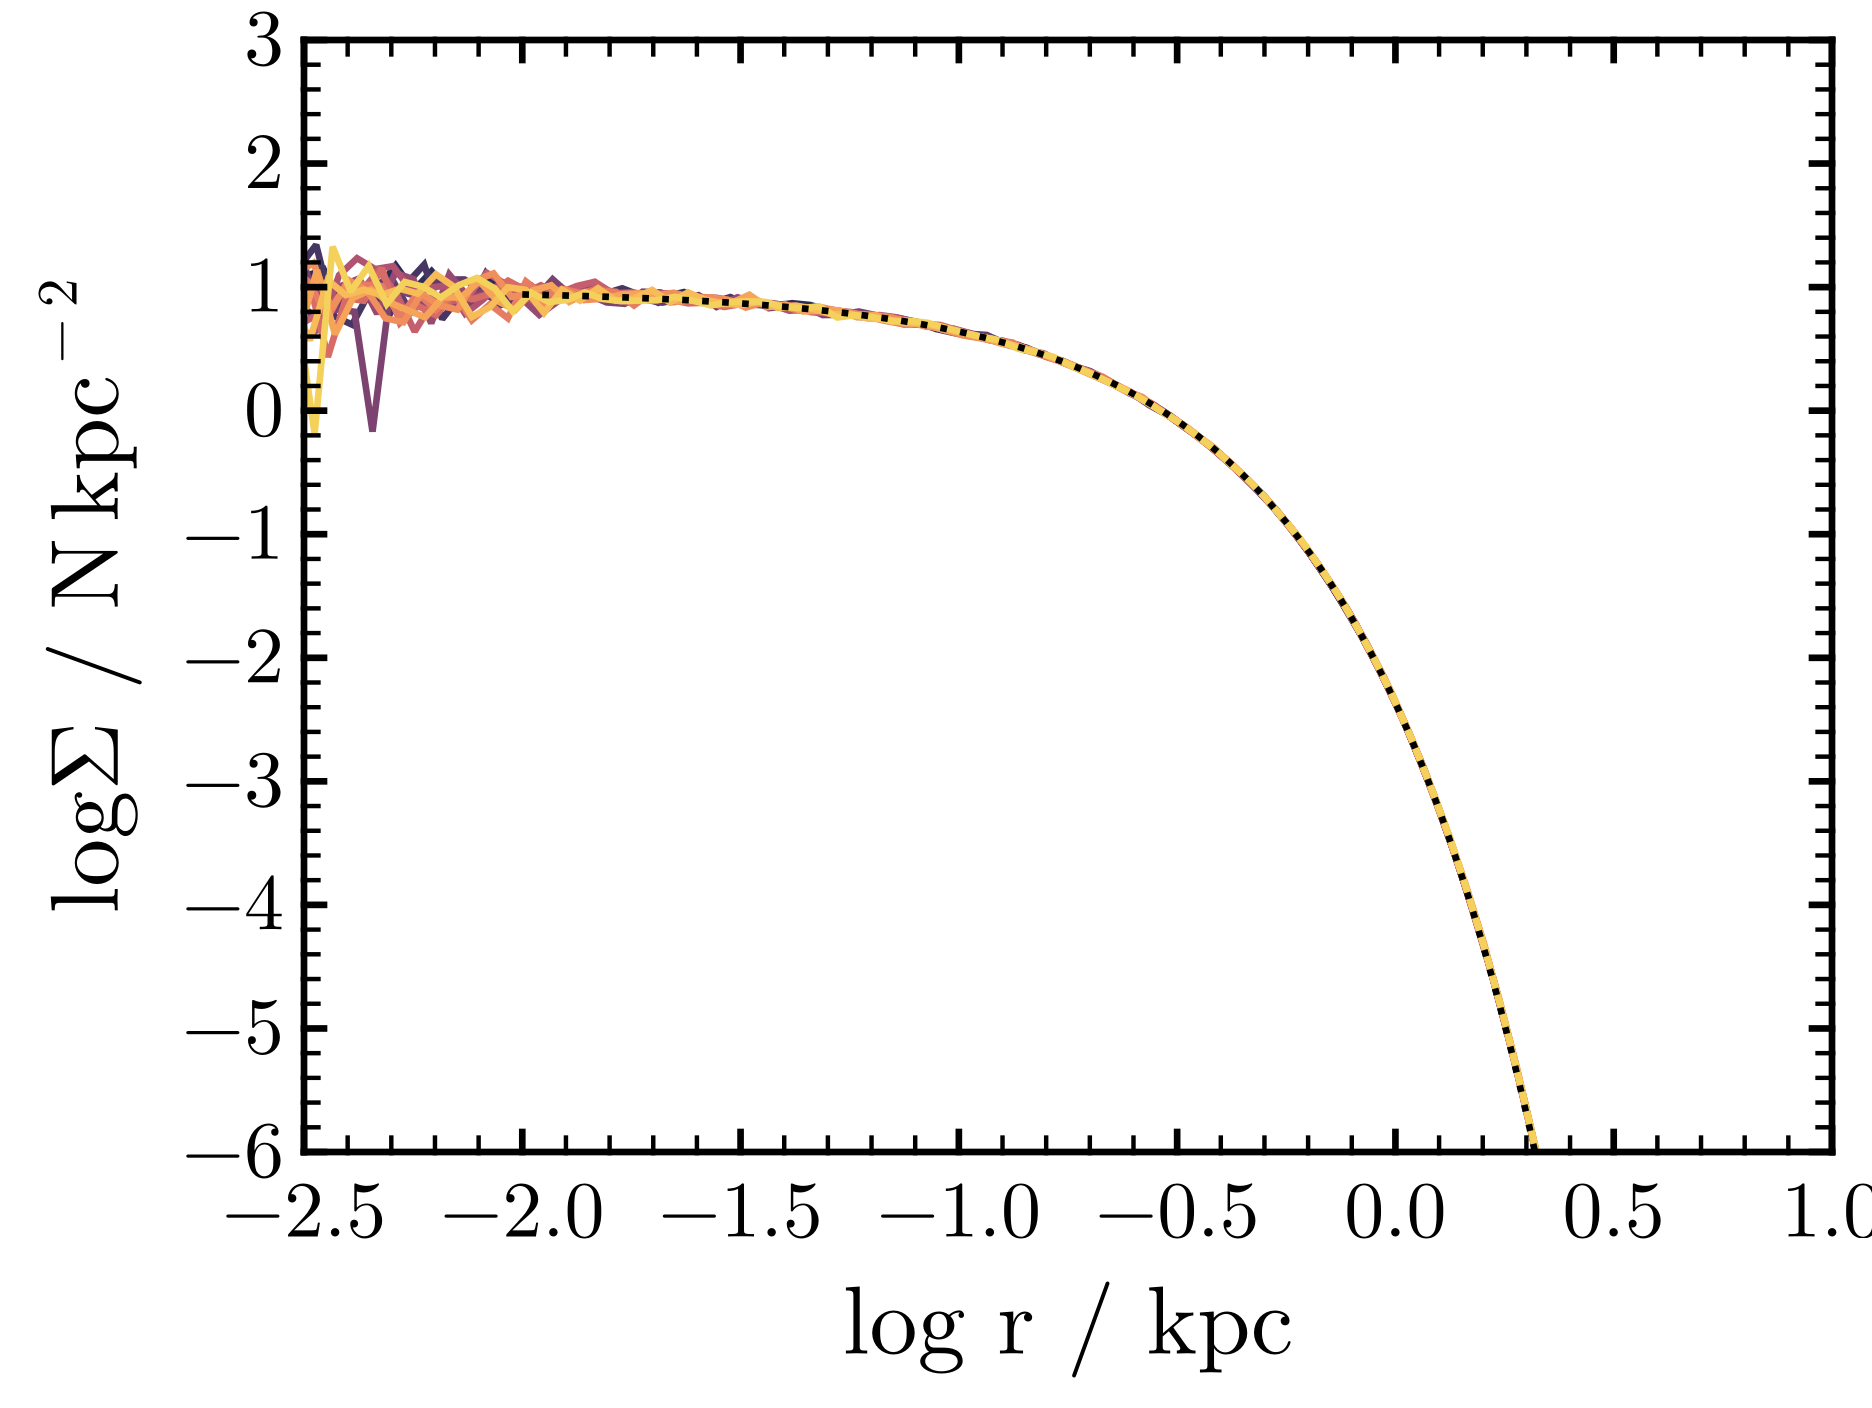

In [37]:
compare_profiles(profs, expected, sequential=true, legend=false)

In [32]:
profs, expected = load_profiles("sculptor/1e7_V31_r3.2/", "plummer_rs0.20");


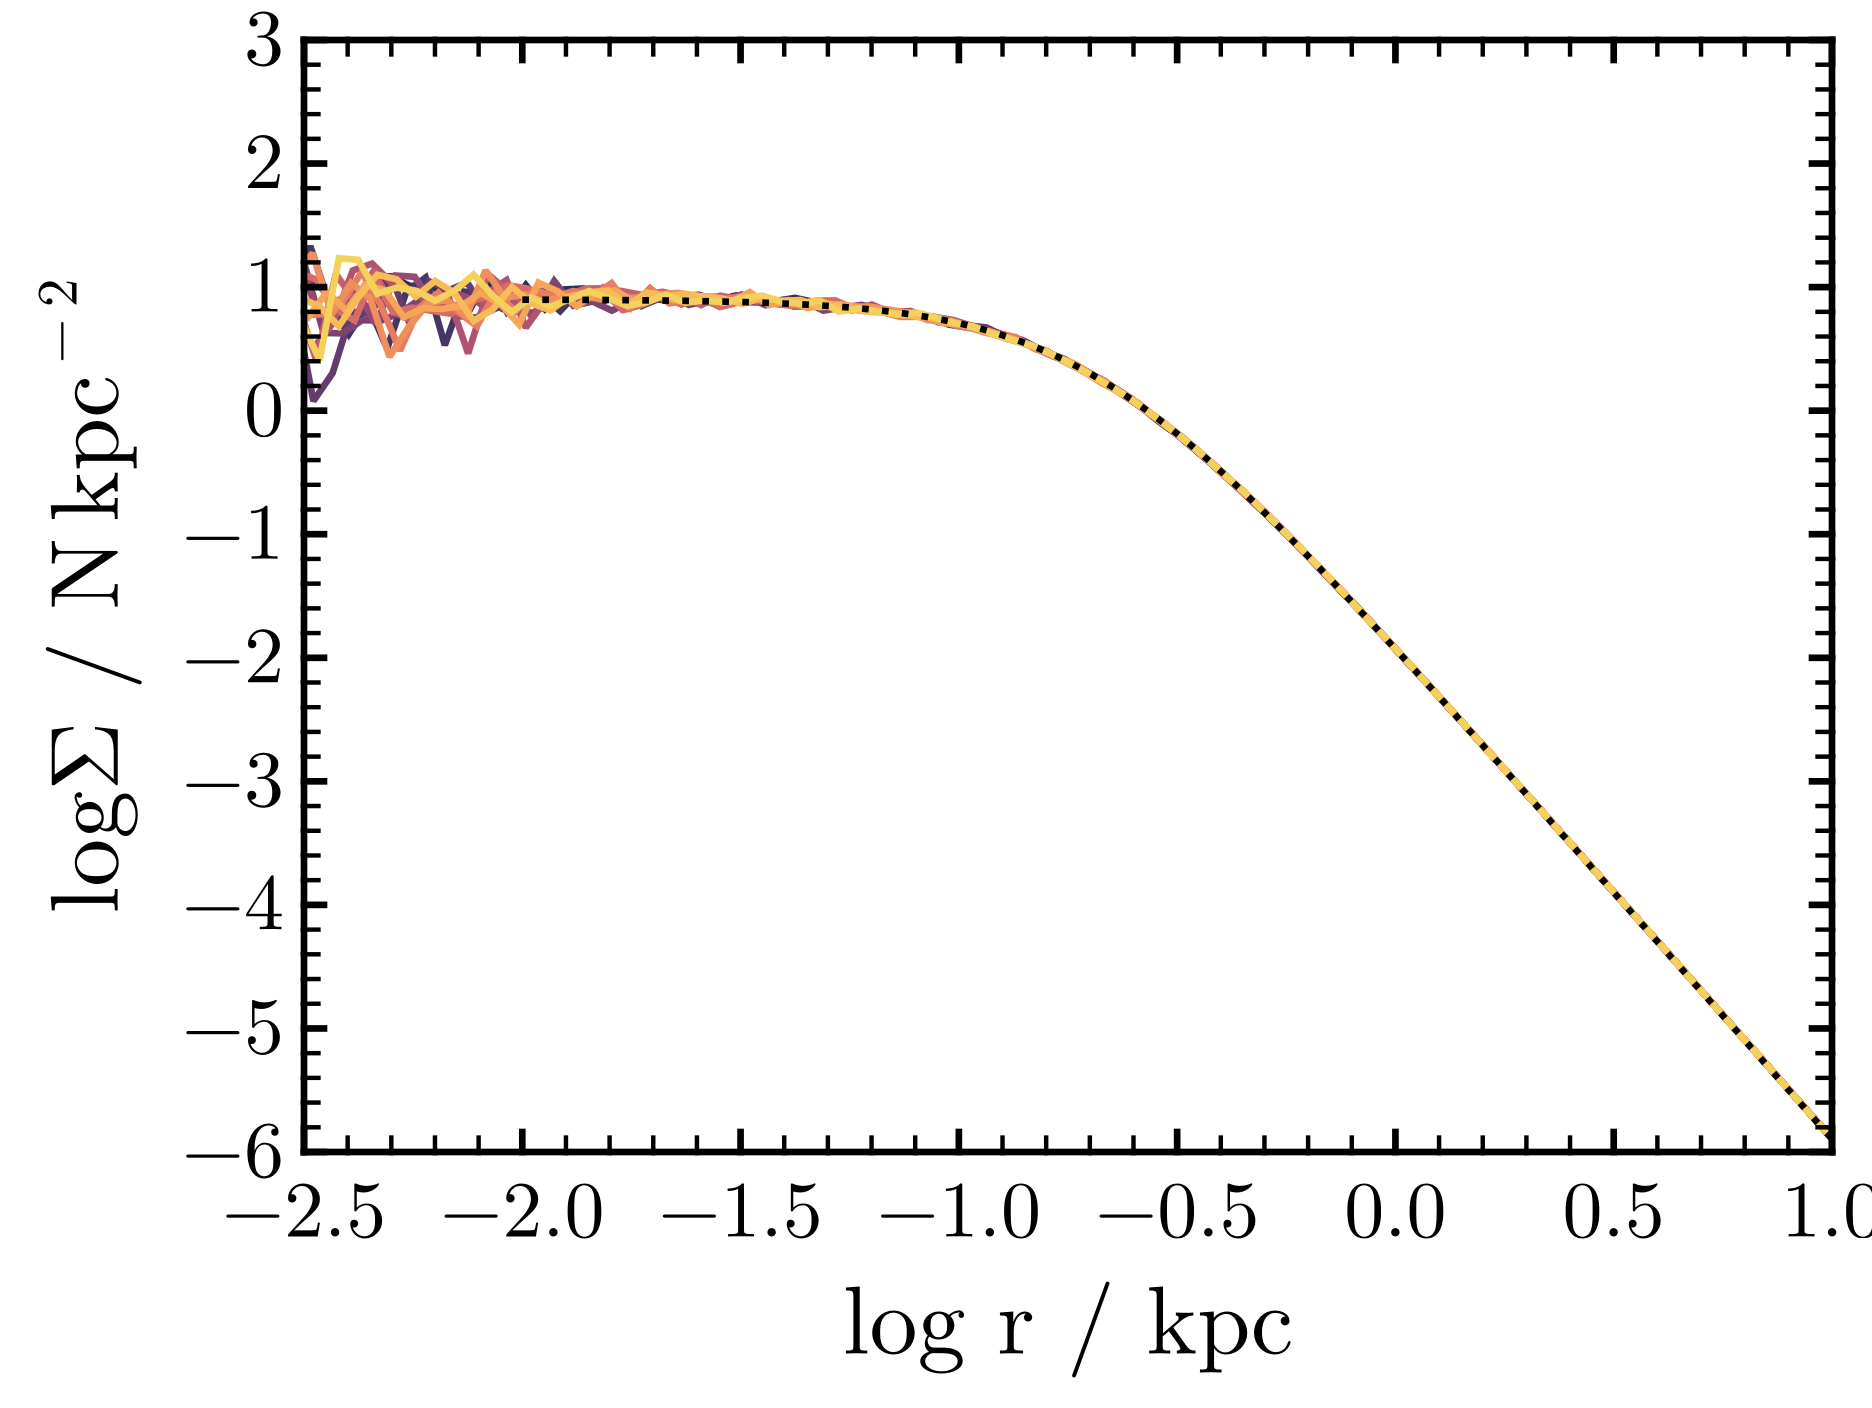

In [33]:
compare_profiles(profs, expected, sequential=true, legend=false)

In [32]:
profs, expected = load_profiles("sculptor/1e7_V31_r3.2/", "plummer_rs0.20");


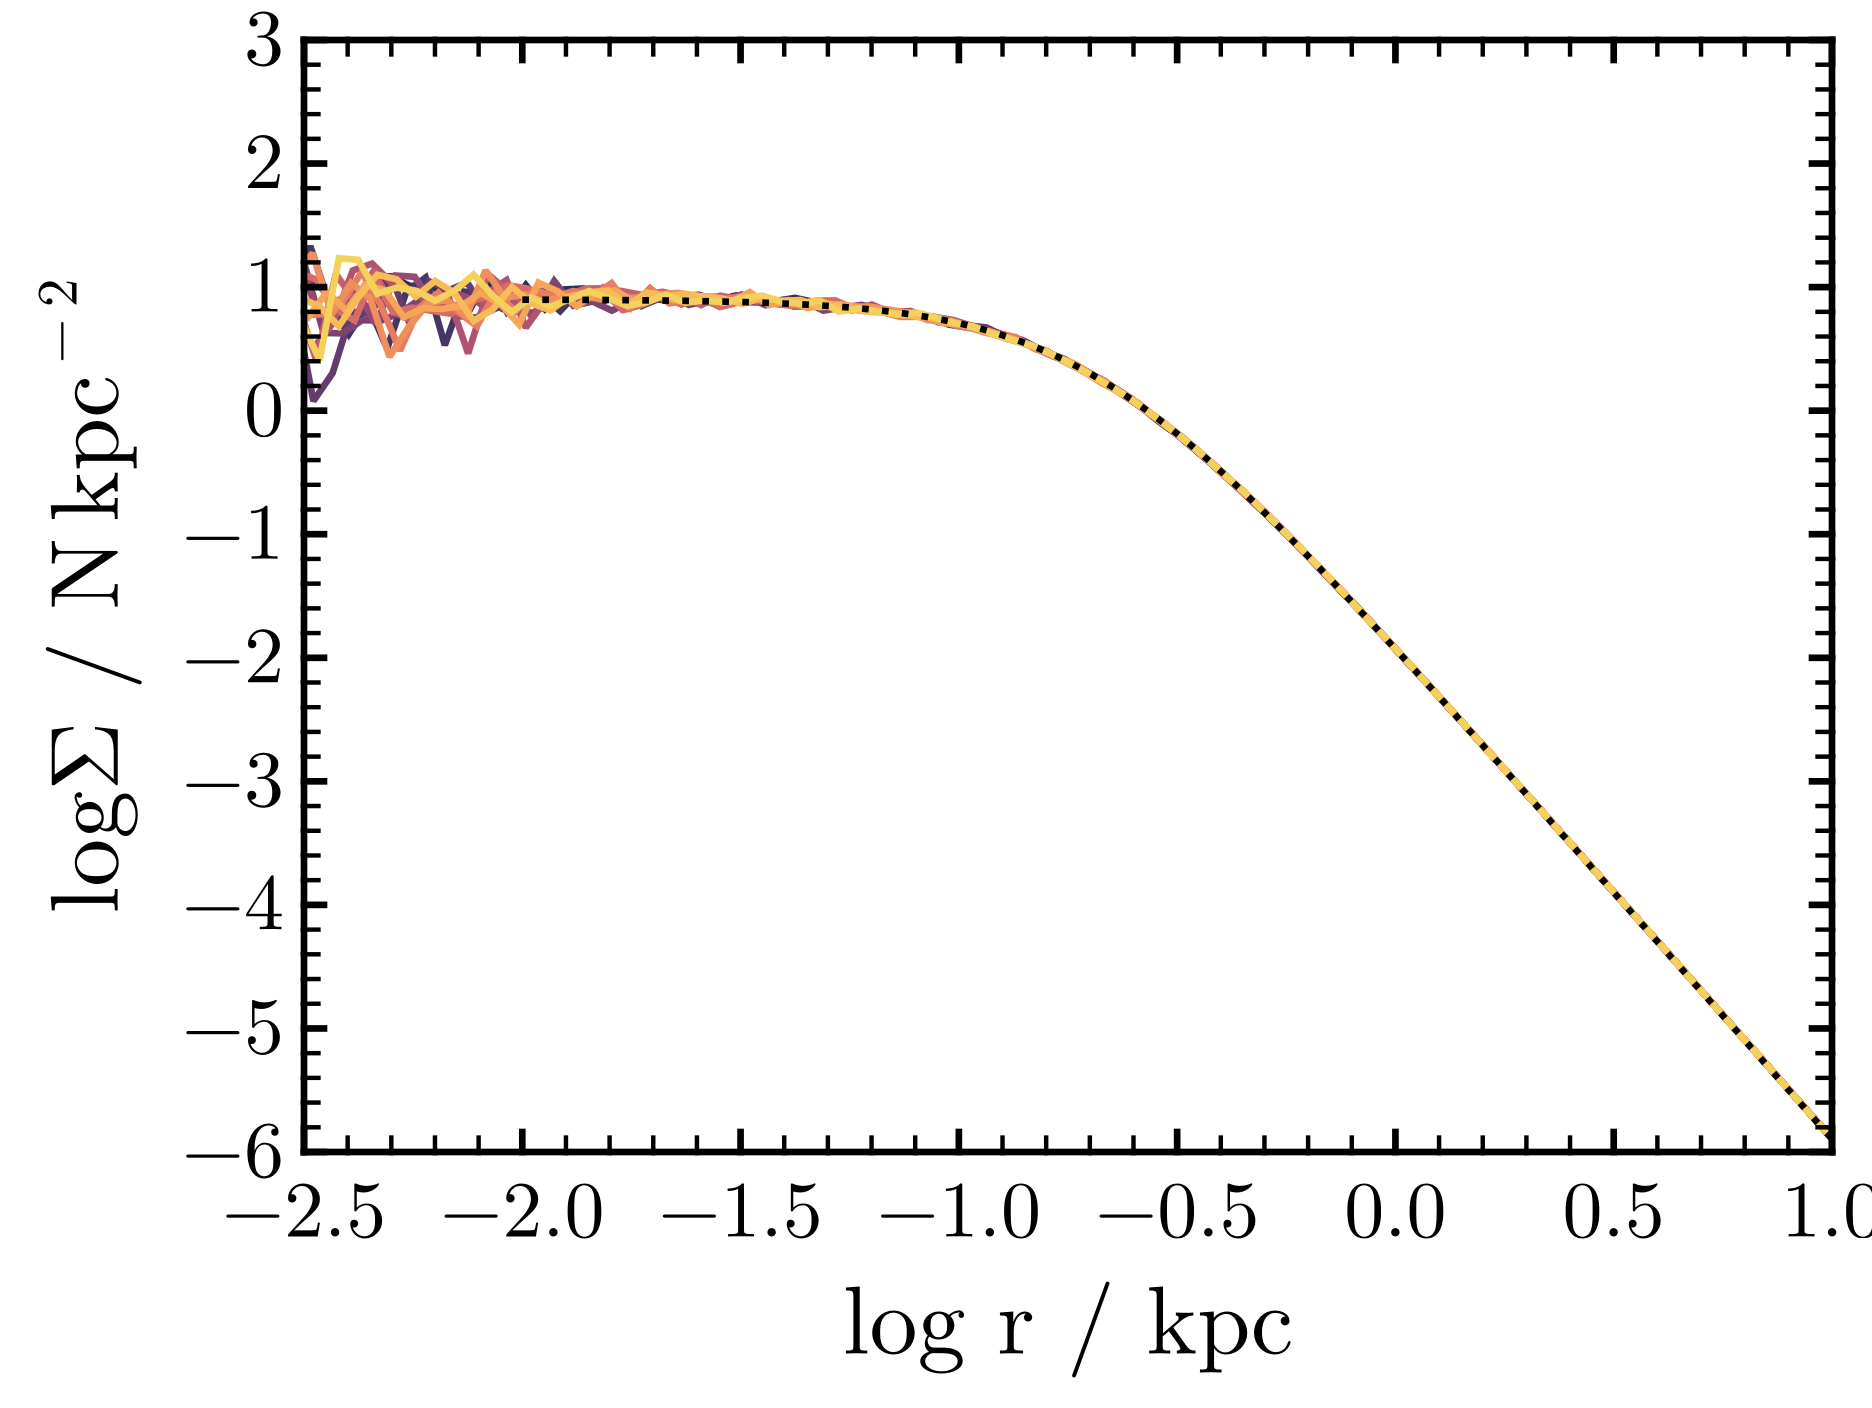

In [33]:
compare_profiles(profs, expected, sequential=true, legend=false)